# Intro

This is my first notebook with Python. I'm gonna use some of the most common Python libraries and load some datasets about movie ratings and I'll perform a basic EDA which stands for [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis).

### Importing libraries

In [3]:
# I'll be using pandas to load the datasets and manipulate the data
import pandas as pd
# Matplotlib is a library for basic plotting
import matplotlib.pyplot as plt
# Seaborn uses Matplotlib under the hood but extends it and provides more powerful visualization patterns
import seaborn as sns
# Numpy is for array manipulation.
# It brings a lot of interesting functionalities that we cannot active only with Python arrays
import numpy as np

### Let's load our dataset
There are a bunc of csv files in the datas folder. I'll start loading `ratings.csv` that contains the data related to movie ratings.

In [5]:
ratings = pd.read_csv("data/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
# The data seat is huge. Let's see the 5 first values
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Data Frame
The data is loaded into a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe) and in this data frame we can perform a lot of manipulations to extract the data we want. Let's analyse the shape of our DataFrame:

In [2]:
ratings.shape

(100836, 4)

Our ratings DataFrame has 100836 entries and 4 columns that contains the id of the user that left the rating, the movie id the rating itself and a timestamp holding the date that the rating was created. We can provide the column names if we want. Let's change the timestamp column name to `createdAt`: 

In [7]:
ratings.columns =  ["userId", "movieId", "rating", "createdAt"]

In [8]:
ratings.head()

,userId,movieId,rating,createdAt
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


We can get all the ratings for all movies. The result type will be a [pandas Series](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series)

In [9]:
moviesRatings = ratings["rating"]

In [6]:
type(ratings["rating"])

pandas.core.series.Series

Let's try to get all the unique ratings that are available in the DataFrame:

In [23]:
np.sort(moviesRatings.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

If we sort the array we can see that the lowest given rating if `0.5` and the highest is `5` so we already know that this is range we'll be working with, but what if we want to count how many times each rating appears in our dataset?

In [24]:
moviesRatings.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

Now that we know we can extract all ratings values from our DataFrame let's try to find the mean of all ratings in our dataset?

In [25]:
ratings_mean = moviesRatings.mean()
ratings_mean

3.501556983616962

Now the visual fun begins 😎 Let's start plotting our data so we can start telling some stories. We can plot a DataFrame as simple as that:

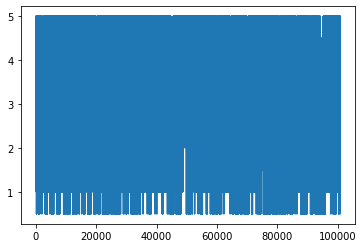

In [26]:
moviesRatings.plot()

Well, this plot doesn't help. As we have 100836 ratings in our DataFrame the plot is very poluted and we can conclude anything. Let's try to plot the first 5 entries by slicing our serie:

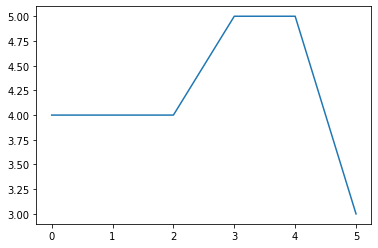

In [29]:
moviesRatings[0:6].plot()

Better, but still not that useful. The line plot doesn't seem to fit well for this use case. Let's try to use a [Histogram](https://www.youtube.com/watch?v=YLPDPglvePY). One of the questions that I asked myself was: what is the difference between a Histogram and a [Bar Graph](https://www.youtube.com/watch?v=FYFYrjMLG7E)? In my opinion the main difference is that a Histogram uses intervals in the x axis. Bar Charts use categories in the x axis.

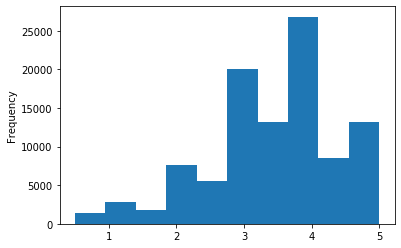

In [28]:
moviesRatings.plot(kind="hist")

# # Conclusion 1
By reading the histogram above we can make a first conclusion! The highest amount or rating are in between 3.5 and 4.


It's also possible to get the median of all rating. The difference between the mean and the median is that the mean is the sum of all ratings divided by the number of ratings. The median is the rating in the middle of the serie. For example, in this array `[1,2,3]` the median is two. Let's check the median:

In [32]:
ratings_median = moviesRatings.median()
ratings_median

3.5

There is also a way to get most of this information from the serie by calling the `describe()` method.

In [34]:
ratings_info = moviesRatings.describe()
ratings_info

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### Interpreting the median

Let's use seaborn to interpret the median. The type used is a [Boxplot](https://www.youtube.com/watch?v=fHLhBnmwUM0).
The line in the middle of the box is the median.
What is the conclusion looking at this data?
50% of the ratings are betwwen 3 in 4.
The other 25% between 4 and 5.
25% between 1.5 and 3.

The points that ar beyond the plotlines are outliers.

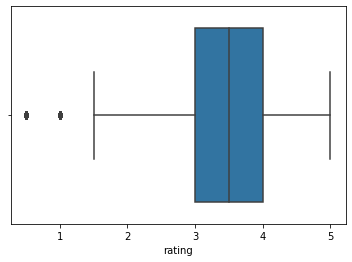

In [35]:
sns.boxplot(moviesRatings)

# # Conclusion 2
Half of all ratings, i.e, 100836 / 2, are between 3 and 4.


### Time to bring more data to this EDA
There is another csv file in the data folder called `movies.csv` with some information about the movies. The ratings that are already loaded in this notebook have a relation with this table. Let's load it.

In [37]:
movies = pd.read_csv("data/movies.csv")

In [38]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Let's check the ratings for Toy Story 😀

### Analyzing Toy Story (1995) ratings

In [42]:
toyStoryRatings = ratings.query("movieId==1")["rating"]

In [43]:
toyStoryRatings

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: rating, Length: 215, dtype: float64

In [44]:
toyStoryRatings.median()

4.0

In [45]:
toyStoryRatings.mean()

3.9209302325581397

In [46]:
toyStoryRatings.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

### Analyzing Jumanji (1995) ratings

In [47]:
jumanjiRatings = ratings.query("movieId==2")["rating"]


In [28]:
jumanjiRatings

560      4.0
1026     4.0
1773     3.0
2275     3.0
2977     3.0
        ... 
95102    4.0
95965    4.0
97044    5.0
97144    3.5
98667    2.0
Name: rating, Length: 110, dtype: float64

In [48]:
jumanjiRatings.median()

3.5

In [29]:
jumanjiRatings.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

# Group ratings by movie

In [56]:
ratings_grouped_by_movie_id = ratings.groupby("movieId")

In [58]:
ratings_by_movie_id = ratingsGroupedByMovieId.mean()["rating"]

In [59]:
ratings_by_movie_id.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

**Ploting ratings means**

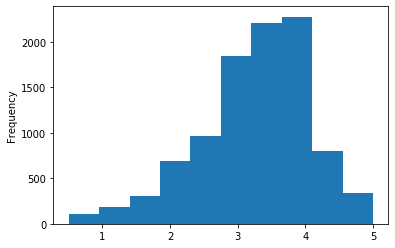

In [63]:
ratings_by_movie_id.plot(kind="hist")

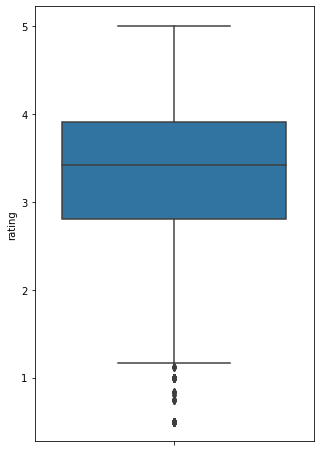

In [64]:
plt.figure(figsize=[5,8])
sns.boxplot(y=ratings_by_movie_id)

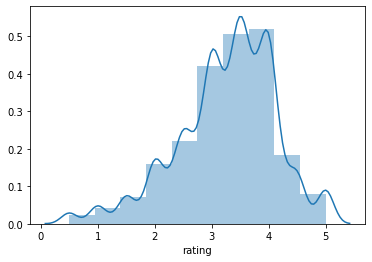

In [66]:
sns.distplot(ratings_by_movie_id, bins=10)

Text(0.5, 1.0, 'Histogram of the movies ratings (Mean)')

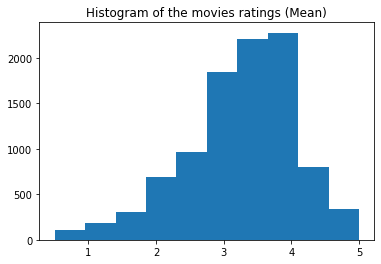

In [70]:
plt.hist(ratings_by_movie_id)
plt.title("Histogram of the movies ratings (Mean)")

# Using movies from TMDB

In [38]:
tmdb = pd.read_csv("data/tmdb_5000_movies.csv")

In [39]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [40]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Data Visualization: Categorical Variables


Write about categories here: Variáveis categóricas. Nominais e Ordinais.

In [41]:
movies_per_language= tmdb["original_language"].value_counts()


In [42]:
movies_per_language

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
ta       2
id       2
ro       2
cs       2
el       1
hu       1
ky       1
te       1
sl       1
no       1
af       1
is       1
ps       1
pl       1
xx       1
nb       1
tr       1
vi       1
Name: original_language, dtype: int64

In [43]:
movies_per_language.to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [44]:
movies_per_language.to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [45]:
movies_per_language.columns = ["original_language", "total"]

In [46]:
movies_per_language

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
ta       2
id       2
ro       2
cs       2
el       1
hu       1
ky       1
te       1
sl       1
no       1
af       1
is       1
ps       1
pl       1
xx       1
nb       1
tr       1
vi       1
Name: original_language, dtype: int64

In [47]:
type(movies_per_language) 

pandas.core.series.Series

If we need to visualizae categories we need to use charts that displa categorial data. https://seaborn.pydata.org/tutorial/categorical.html

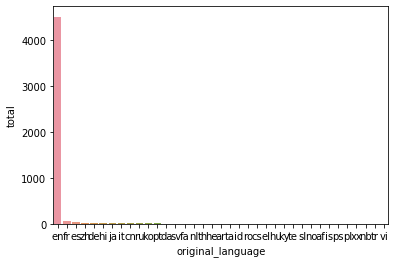

In [48]:
movies_per_language= tmdb["original_language"].value_counts().to_frame().reset_index()

movies_per_language.columns = ["original_language", "total"]
movies_per_language
sns.barplot(data = movies_per_language, x = "original_language", y = "total" )

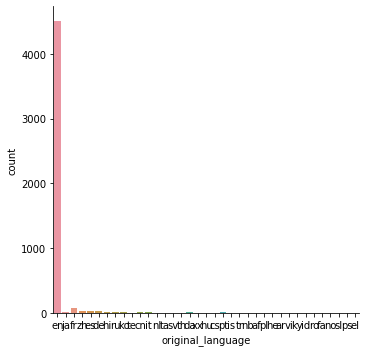

In [49]:
sns.catplot(data = tmdb, x = "original_language", kind="count" )

([<matplotlib.patches.Wedge at 0x7fe80fb1ead0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.37103399401244586, 'fr'),
  Text(1.0579676486019882, -0.30117180231817847, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882624, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.1084677842516155, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357273, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Tex

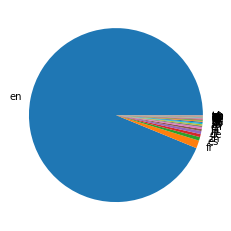

In [50]:
plt.pie(movies_per_language["total"], labels = movies_per_language["original_language"])

Compare en with the other languages

In [51]:
total_per_language = tmdb["original_language"].value_counts()

In [52]:
total_per_language

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ar       2
ta       2
id       2
ro       2
cs       2
el       1
hu       1
ky       1
te       1
sl       1
no       1
af       1
is       1
ps       1
pl       1
xx       1
nb       1
tr       1
vi       1
Name: original_language, dtype: int64

In [53]:
total_en = total_per_language["en"]
total_en

4505

In [54]:
total = total_per_language.sum()

In [55]:
total

4803

In [56]:
remaining = total - total_en

In [57]:
remaining

298

In [58]:
series = [total_en, remaining]

In [59]:
data = {
    'language': ['en', 'others'],
    'total': [total_en, remaining]
}
data

{'language': ['en', 'others'], 'total': [4505, 298]}

In [60]:
data_df = pd.DataFrame(data)

In [61]:
data_df

,language,total
0,en,4505
1,others,298


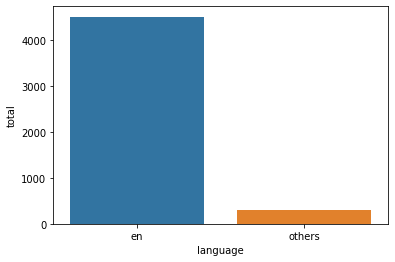

In [62]:
sns.barplot(x = "language", y = "total", data = data_df)

([<matplotlib.patches.Wedge at 0x7fe8106ecc90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0791697511565306, -0.21305550494824674, 'others')])

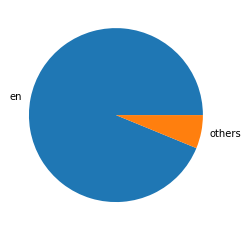

In [63]:
plt.pie(data_df["total"],labels = data_df["language"])

Let's visualize now inside of other how is the distribution of the movies?

In [64]:
total_per_language_not_en = tmdb.query("original_language != 'en'")
total_per_language_not_en

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

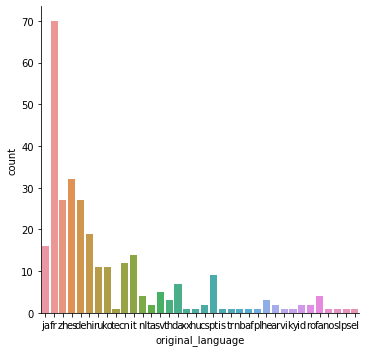

In [65]:
sns.catplot(x = "original_language", data = total_per_language_not_en, kind ="count")

Refining the visualization

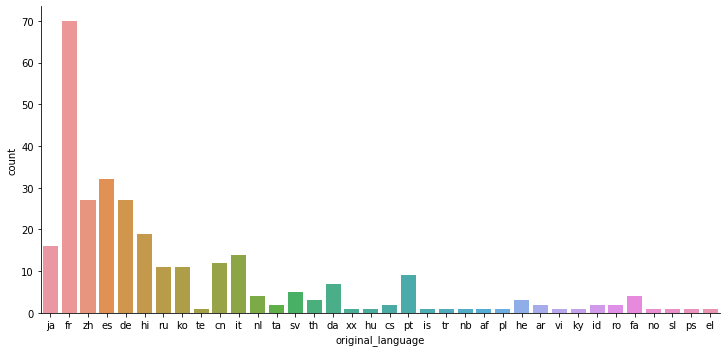

In [66]:
#plt.figure(figsize=[5,10])
# catplot os high level so trying to refine the visualization with figure will not work
sns.catplot(x = "original_language", data = total_per_language_not_en, kind ="count", aspect=2)

When plotting by category and there is no specific order. For example, fr is not greater than pl. But we can order for the category value.

In [67]:
total_per_language_not_en.index

Int64Index([  97,  235,  317,  474,  492,  678,  786,  861,  985, 1011,
            ...
            4684, 4686, 4695, 4699, 4719, 4739, 4751, 4790, 4792, 4798],
           dtype='int64', length=298)

In [68]:
comparison_count = total_per_language_not_en["original_language"].value_counts()
comparison_count

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
ar     2
ta     2
cs     2
ro     2
af     1
xx     1
tr     1
te     1
ky     1
sl     1
no     1
is     1
el     1
pl     1
nb     1
vi     1
hu     1
ps     1
Name: original_language, dtype: int64

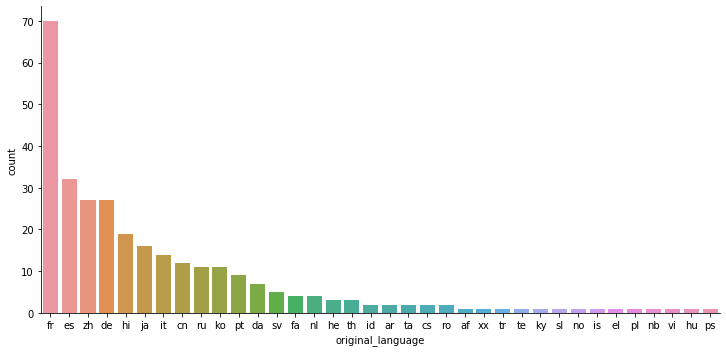

In [69]:
sns.catplot(x = "original_language", data = total_per_language_not_en, kind ="count", aspect=2, order=comparison_count.index)

Using a more meaningful palette

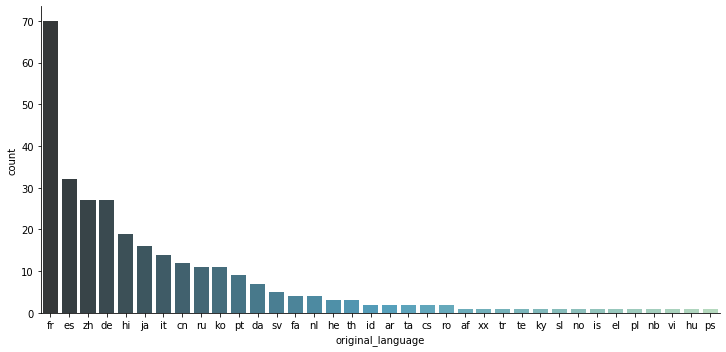

In [70]:
sns.catplot(palette="GnBu_d", x = "original_language", data = total_per_language_not_en, kind ="count", aspect=2, order=comparison_count.index)

Basic statistics:
    Mean, median, devi, boxplot, hist, tendency central, dispersion

In [71]:
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [72]:
toystoryratings = ratings.query("movie==1")
toystoryratings

,user,movie,rating,createdAt
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [73]:
jumanjiratings = ratings.query("movie==2")
jumanjiratings

,user,movie,rating,createdAt
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [74]:
len(toystoryratings)

215

In [75]:
len(jumanjiratings)

110

In [76]:
toystoryratings["rating"].mean()

3.9209302325581397

In [77]:
jumanjiratings["rating"].mean()

3.4318181818181817

These are the mean notes. It doesn;t say much how many people liked or dislikes the movies. Is the differences great?

In [78]:
toystoryratings["rating"].median()

4.0

In [79]:
jumanjiratings["rating"].median()

3.5

The median will separate all the ratings, but how many were 5? Both try to summarize the distribution of our data in one point. But we lose the distribution of data. For example:

In [81]:
my_ratings = np.array([2.5] * 10)
my_ratings

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [82]:
my_ratings.mean()

2.5

In [83]:
my_ratings2 = np.array([3.5] * 10)
my_ratings2

array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [84]:
movie1 = np.append(my_ratings, my_ratings2)
movie1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [85]:
movie2 = np.append(np.array([5] * 10), np.array([1] * 10))
movie2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
movie1.mean()

3.0

In [87]:
movie2.mean()

3.0

Both ratings have the same mean, but there is a clear difference in the values. If you look to the movie 1 there are more median values, but movie2 the distribution is much bigger.

In [88]:
np.median(movie1)

3.0

In [89]:
np.median(movie2)

3.0

These groups are very different. The first one is liking, but the other is hating. How can we better visualize the distribution?

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

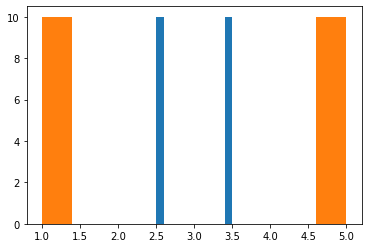

In [90]:
plt.hist(movie1)
plt.hist(movie2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe811c71fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe811cd4ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe811c55b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe811cdb550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe811cdba50>,
 'means': []}

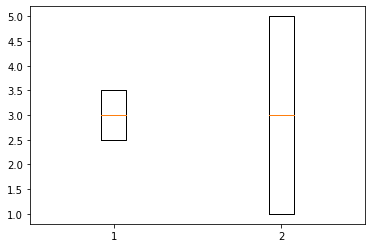

In [91]:
plt.boxplot([movie1, movie2])

With this boxplot is better to visualize the distribution.

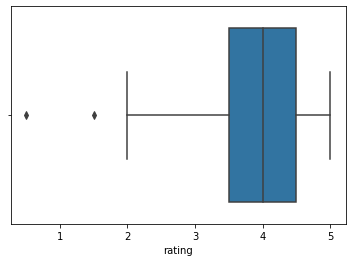

In [92]:
sns.boxplot(toystoryratings["rating"])

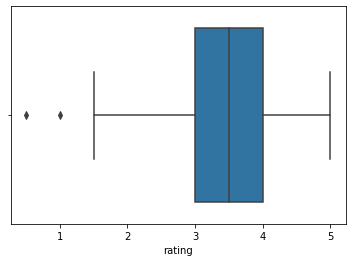

In [93]:
sns.boxplot(jumanjiratings["rating"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe811f3aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe811f3f510>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe811ebc250>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe811f3ff50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe811f2ae10>,
 'means': []}

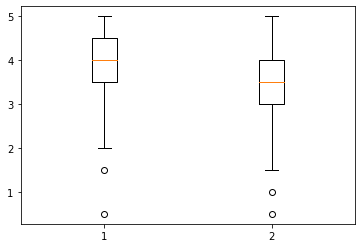

In [94]:
plt.boxplot([toystoryratings["rating"], jumanjiratings["rating"]])

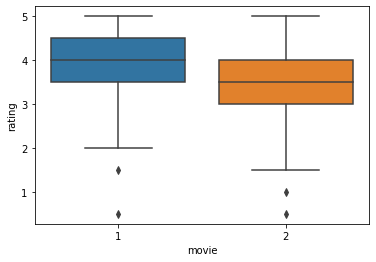

In [97]:
sns.boxplot(data = ratings.query("movie in [1,2]"), x = "movie", y = "rating")

With seaborn it's easier to experiment with data with you still didn't separate it it it's own data sets. For example here I'm dealing with the data frame and defining all I want in the chart.

Now the questions is: can we define in one number how much the ratings are deviating from the mean? Yes and it is calles standard deviation and it says how much the data runs away from a central tendency.

In [99]:
toystoryratings["rating"].std()

0.8348591407114045

In [100]:
jumanjiratings["rating"].std()

0.8817134921476455

The mean with the std will tell us a bit more. Not only a central tendency, but the distribution.

In [101]:
np.std(movie1)

0.5

In [102]:
np.std(movie2)

2.0

After this explorations, does this distribution tell us something? Now we start the process of analyzing the data statistically. We can do regressions, for example.